## Read Undersampled_data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set

Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from svm_method.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from split_data_set.ipynb


In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

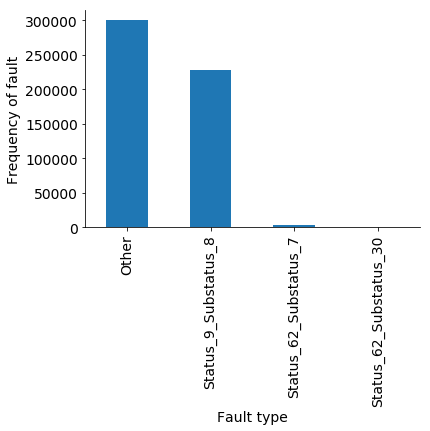

<Figure size 1440x1152 with 0 Axes>

In [3]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [4]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [7]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,50000)

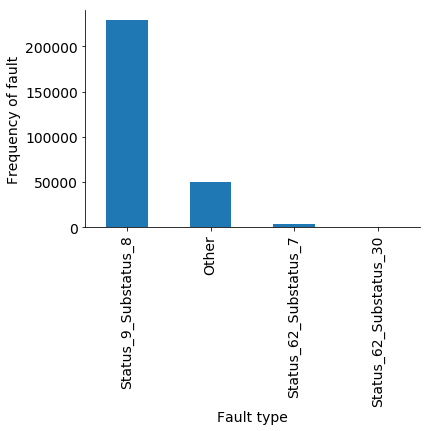

<Figure size 1440x1152 with 0 Axes>

In [8]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [5]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status

In [6]:
y.value_counts()

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64

### Split into training and test

In [ ]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

## Random forest and feature importance

In [ ]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [ ]:
rf

# Preprocessing

### Scale dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_X = scaler.fit(X)
scaled_X = scaled_X.transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=list(X))
scaled_X.head(10)

### SVM method

In [ ]:
svm_method.get_svm_model(X_train, X_test, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique):

In [ ]:
sm = SMOTE(random_state=12)
X_